# Cluster the results from Cosine Similarity Analysis
We utilize spectral clustering for now. But areas for further research include community detection

There is a lot that can be done here, but I am kind of just shooting in the dark until I develop some the HEOR analysis and visualizations.  I will return to this. 
  * I will likely need to push all this into a .py file because I will likely want to be able to run an entire analysis from the command line

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import networkx as nx

# all my graph functions
from graphUtils import *

In [3]:
inout_dir = "../data/graphs/"

In [4]:
G = nx.read_gpickle(inout_dir +  "cosineGraph_K10_averaged.pkl")
G

In [5]:
np.max(nx.to_numpy_matrix(G))    

0.9974760831086952

In [6]:
adj_mat = nx.to_numpy_matrix(G)
adj_mat /= np.max(np.abs(adj_mat)) # scale between 0 and 1 - since multigraph, similarity can exceed 1 

## Identify the Optimal Cluster

array([  54,   60,   66,   72,   75,   77,   80,   87,   89,   92,   98,
        103,  109,  111,  117,  120,  125,  129,  136,  145,  147,  151,
        156,  159,  162,  168,  172,  177,  185,  188,  192,  196,  212,
        207,  204,  201,  239,  247,  294,  337,  376,  409,  440,  468,
        494,  526,  564,  562,  571,  613,  625,  646,  662,  676,  696,
        719,  747,  789,  828,  842,  870,  872,  881,  874,  908,  942,
        959,  985,  991, 1019, 1052, 1066, 1100, 1096, 1105, 1124, 1157,
       1168, 1194, 1217, 1254, 1266, 1285, 1318, 1353, 1372, 1399, 1436,
       1458, 1455, 1488, 1504, 1520, 1539, 1565, 1599, 1617, 1651, 1682,
       1700], dtype=int64)

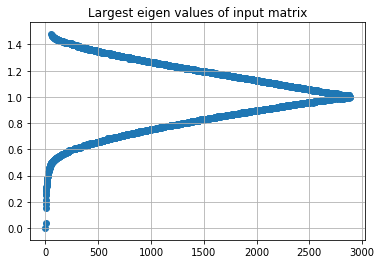

In [7]:
# compute optimal number of clusters with eigen gap statistic
nb_clusters, eigenvalues, eigenvectors = eigenDecomposition(adj_mat, topK = 100)
nb_clusters

In [8]:
# run spectral clustering 
sc, adj_mat = spectralCluster(G, 2)
sc.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
np.unique(sc.labels_, return_counts=True)

(array([0, 1]), array([1394, 1490], dtype=int64))

In [10]:
cluster_df = pd.DataFrame(list(zip(list(G.nodes()), list(sc.labels_))), columns = ['subject_id', 'cluster'])
cluster_df

,subject_id,cluster
0,4,0
1,314,0
2,761,0
3,1152,0
4,3064,0
...,...,...
2879,95118,1
2880,90886,1
2881,92933,1
2882,96040,1


In [11]:
cluster_df.to_csv(inout_dir +  "cosine_cluster5.csv", index = False)